# On va dans ce fichier créer les graphiques permettant de voir les taux d'effort selon trois définition du revenu : - revenu total - revenu disponible - revenu disponible plus loyer imputé


# Imports de modules généraux

In [18]:
from __future__ import division

import pandas
from pandas import concat
import seaborn

# Import de modules spécifiques à OpenFisca

In [19]:
from openfisca_france_indirect_taxation.examples.utils_example import (
    create_survey_scenario,
    simulate,
    graph_builder_line_percent,
    save_dataframe_to_graph
    )
from openfisca_france_indirect_taxation.surveys import SurveyScenario


# Import d'une nouvelle palette de couleurs

In [20]:
seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Sélection des variables utilisées pour la simulation

In [21]:
variables = [
    'revtot',
    'somme_coicop12_conso',
    'rev_disponible',
    'rev_disp_loyerimput',
    'total_taxes_indirectes'
    ]


# Constitution d'une base de donnée agrégée par décile de revenu et réalisation des graphiques

Taux d'effort des ménages par rapport à leur revtot


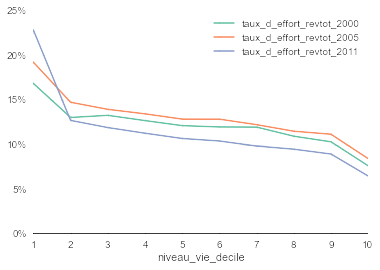

Taux d'effort des ménages par rapport à leur rev_disponible


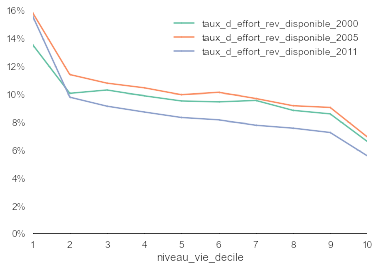

Taux d'effort des ménages par rapport à leur rev_disp_loyerimput


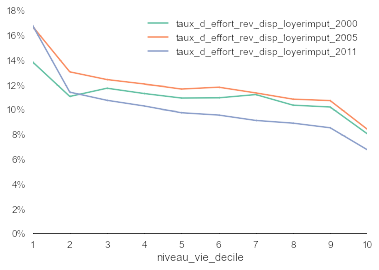

In [22]:
for revenu in ['revtot', 'rev_disponible', 'rev_disp_loyerimput']:
    taux_d_effort = pandas.DataFrame()
    for year in [2000, 2005, 2011]:
        survey_scenario = create_survey_scenario(year)
        simulation = survey_scenario.new_simulation()
        pivot_table = pandas.DataFrame()
        for values in ['revtot', 'total_taxes_indirectes', 'rev_disponible', 'rev_disp_loyerimput']:
            pivot_table = pandas.concat([
                pivot_table,
                survey_scenario.compute_pivot_table(values = [values], columns = ['niveau_vie_decile'])
                ])
        df = pivot_table.T

        df.rev_disponible = df.rev_disponible * 1.33

        taux_d_effort['taux_d_effort_{}_{}'.format(revenu, year)] = \
            df['total_taxes_indirectes'] / df[revenu]

    print '''Taux d'effort des ménages par rapport à leur {}'''.format(revenu)
    graph_builder_line_percent(taux_d_effort, 1, 1)
